In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.duplicated().sum() 

18078

In [6]:
m=df.drop_duplicates()

In [7]:
m.Sex.value_counts()

Female    159671
Male      142046
Name: Sex, dtype: int64

In [8]:
df.Sex.value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [9]:
df.shape

(319795, 18)

In [10]:
df[df==0].count()

HeartDisease             0
BMI                      0
Smoking                  0
AlcoholDrinking          0
Stroke                   0
PhysicalHealth      226589
MentalHealth        205401
DiffWalking              0
Sex                      0
AgeCategory              0
Race                     0
Diabetic                 0
PhysicalActivity         0
GenHealth                0
SleepTime                0
Asthma                   0
KidneyDisease            0
SkinCancer               0
dtype: int64

In [11]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [12]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [13]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['HeartDisease']=np.where(df['HeartDisease']=='Yes',1,0)

In [15]:
df['Smoking']=np.where(df['Smoking']=='Yes',1,0)

In [16]:
df['Stroke']=np.where(df['Stroke']=='Yes',1,0)

In [17]:
df['AlcoholDrinking']=np.where(df['AlcoholDrinking']=='Yes',1,0)

In [18]:
df['Diabetic']=np.where(df['Diabetic']=='Yes',1,0)

In [19]:
df['PhysicalActivity']=np.where(df['PhysicalActivity']=='Yes',1,0)

In [20]:
df['Asthma']=np.where(df['Asthma']=='Yes',1,0)

In [21]:
df['KidneyDisease']=np.where(df['KidneyDisease']=='Yes',1,0)

In [22]:
df['SkinCancer']=np.where(df['SkinCancer']=='Yes',1,0)

In [23]:
df['DiffWalking']=np.where(df['DiffWalking']=='Yes',1,0)

In [24]:
df['Sex']=np.where(df['Sex']=='Male',1,0)

In [25]:
df.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [26]:
lable={ '80 or older':13,'75-79':12,'70-74':11, '65-69':10,'60-64':9,'55-59':8, 
        '50-54':7, '45-49':6,'40-44':5, '35-39':4, '30-34':3, '25-29':2,'18-24':1
}
df['AgeCategory1']=df['AgeCategory'].map(lable)
df.drop(columns=['AgeCategory'],axis=1,inplace=True)

In [27]:
df.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [28]:
df.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [29]:
lable={'Excellent':5,'Very good':4, 'Good':3,'Fair':2,'Poor':1}
df['GenHealth1']=df['GenHealth'].map(lable)
df.drop(columns=['GenHealth'],axis=1,inplace=True)

In [30]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory1,GenHealth1
0,0,16.60,1,0,0,3.0,30.0,0,0,White,1,1,5.0,1,0,1,8,4
1,0,20.34,0,0,1,0.0,0.0,0,0,White,0,1,7.0,0,0,0,13,4
2,0,26.58,1,0,0,20.0,30.0,0,1,White,1,1,8.0,1,0,0,10,2
3,0,24.21,0,0,0,0.0,0.0,0,0,White,0,0,6.0,0,0,1,12,3
4,0,23.71,0,0,0,28.0,0.0,1,0,White,0,1,8.0,0,0,0,5,4


In [31]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory1,GenHealth1
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.183072,-0.100030,0.008327,0.041444,0.145197,0.093317,0.233432,-0.243182
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,0.203494,-0.150616,-0.051822,0.092345,0.050768,-0.033644,-0.004744,-0.230720
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.058434,-0.097174,-0.030336,0.024149,0.034920,0.033977,0.128331,-0.174717
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.058208,0.017487,-0.005065,-0.002202,-0.028280,-0.005702,-0.059528,0.029780
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.108407,-0.079455,0.011900,0.038866,0.091167,0.048116,0.137822,-0.168090
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.158207,-0.232283,-0.061387,0.117907,0.142197,0.041700,0.110763,-0.482697
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,0.025480,-0.095808,-0.119717,0.114008,0.037281,-0.033412,-0.155506,-0.241625
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.216605,-0.278524,-0.022216,0.103222,0.153064,0.064840,0.243263,-0.413797
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,0.020718,0.048247,-0.015704,-0.069191,-0.009084,0.013434,-0.067478,0.025947
Diabetic,0.183072,0.203494,0.058434,-0.058208,0.108407,0.158207,0.025480,0.216605,0.020718,1.000000,-0.140571,0.006658,0.044565,0.154268,0.037663,0.211174,-0.276990


In [32]:
df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [33]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory1,GenHealth1
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,0.127588,0.775362,7.097075,0.134061,0.036833,0.093244,7.514536,3.595028
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,0.333631,0.417344,1.436007,0.340718,0.188352,0.290775,3.564759,1.042918
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,5.000000,3.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,8.000000,4.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,10.000000,4.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,13.000000,5.000000


In [34]:
df[(df['SleepTime']>12)&(df.HeartDisease==1)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory1,GenHealth1
10,1,34.30,1,0,0,30.0,0.0,1,1,White,1,0,15.0,1,0,0,9,1
5519,1,25.00,1,1,0,0.0,0.0,0,0,White,0,1,20.0,0,1,0,13,3
5680,1,24.41,1,0,0,5.0,0.0,0,1,White,0,1,15.0,0,0,1,10,3
9358,1,75.77,1,1,1,0.0,30.0,1,1,Black,1,0,15.0,1,0,0,3,2
9499,1,83.00,1,1,1,30.0,30.0,1,1,Asian,0,0,18.0,1,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304960,1,36.49,1,0,0,30.0,30.0,1,0,White,0,0,15.0,1,0,0,8,2
306105,1,41.21,1,0,0,10.0,0.0,0,0,White,1,0,16.0,1,0,0,10,2
306678,1,31.32,0,0,0,0.0,0.0,1,0,White,1,0,20.0,1,0,0,11,2
309380,1,55.79,1,1,0,20.0,25.0,1,1,White,1,0,13.0,1,0,0,10,1


In [35]:
np.percentile(df.SleepTime,99.8)

15.0

In [36]:
np.percentile(df.SleepTime,2)

4.0

In [37]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory1,GenHealth1
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,0.127588,0.775362,7.097075,0.134061,0.036833,0.093244,7.514536,3.595028
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,0.333631,0.417344,1.436007,0.340718,0.188352,0.290775,3.564759,1.042918
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,5.000000,3.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,8.000000,4.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,10.000000,4.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,13.000000,5.000000


In [38]:
np.percentile(df.BMI,97.6)

44.01

In [39]:
df=pd.get_dummies(df)
#df.drop(columns=['Race'],axis=1,inplace=True)

In [40]:
lable2={ 30:6,29:6,28:6,27:6,26:6,25:5,24:5,23:5,22:5,21:5,20:4,19:4,18:4,17:4,16:4,15:3,14:3,
        13:3,12:3,11:3,10:2,9:2,8:2,7:2,6:2,5:1,4:1,3:1,2:1,1:1,0:1}

df['PhysicalHealth1']=df['PhysicalHealth'].map(lable2)
df.drop(columns=['PhysicalHealth'],axis=1,inplace=True)

In [41]:
df['MentalHealth1']=df['MentalHealth'].map(lable2)
df.drop(columns=['MentalHealth'],axis=1,inplace=True)

In [42]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,...,AgeCategory1,GenHealth1,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalHealth1,MentalHealth1
0,0,16.60,1,0,0,0,0,1,1,5.0,...,8,4,0,0,0,0,0,1,1,6
1,0,20.34,0,0,1,0,0,0,1,7.0,...,13,4,0,0,0,0,0,1,1,1
2,0,26.58,1,0,0,0,1,1,1,8.0,...,10,2,0,0,0,0,0,1,4,6
3,0,24.21,0,0,0,0,0,0,0,6.0,...,12,3,0,0,0,0,0,1,1,1
4,0,23.71,0,0,0,1,0,0,1,8.0,...,5,4,0,0,0,0,0,1,6,1


In [43]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=2,shuffle=y)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(255836, 22)
(255836,)
(63959, 22)
(63959,)


In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,log_loss
def val_values(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    ac=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    los=log_loss(y_test,y_pred)
    print('confusion_matrix=\n',cm)
    print('Accuracy',ac)
    print('recall',rec)
    print('precision',prec)
    print('loss',los)

In [47]:
from sklearn.metrics import classification_report
def val_class(y_test,y_pred):
    print(classification_report(y_test, y_pred))


In [48]:
def random(x_train,y_train,x_test,y_test):
    from sklearn.ensemble import RandomForestClassifier
    model=RandomForestClassifier(n_estimators=19,criterion='gini',max_depth=35)
    model.fit(x_train,y_train)
    y_pred_f=model.predict(x_test)
    print(val_values(y_test,y_pred_f))
    print(val_class(y_test,y_pred_f))


In [49]:
random(x_train,y_train,x_test,y_test)

confusion_matrix=
 [[56894  1636]
 [ 4619   810]]
Accuracy 0.9022029737800779
recall 0.14919874746730521
precision 0.3311529026982829
loss 3.3778100735090004
None
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     58530
           1       0.33      0.15      0.21      5429

    accuracy                           0.90     63959
   macro avg       0.63      0.56      0.58     63959
weighted avg       0.87      0.90      0.88     63959

None


# under sampling

In [50]:
count_class_0,count_class_1=df.HeartDisease.value_counts()
df_class_0=df[df['HeartDisease']==0]
df_class_1=df[df['HeartDisease']==1]

In [51]:
count_class_0,count_class_1

(292422, 27373)

In [52]:
df_class_0.shape

(292422, 23)

In [53]:
df_class_1.shape

(27373, 23)

In [54]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random under sample:')
print(df_test_under.HeartDisease.value_counts())

Random under sample:
0    27373
1    27373
Name: HeartDisease, dtype: int64


In [55]:
x=df_test_under.drop(columns=['HeartDisease'])
y=df_test_under['HeartDisease']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=2,shuffle=y)

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(43796, 22)
(43796,)
(10950, 22)
(10950,)


In [57]:
y_train.value_counts()

1    21941
0    21855
Name: HeartDisease, dtype: int64

In [58]:
random(x_train,y_train,x_test,y_test)

confusion_matrix=
 [[3974 1544]
 [1307 4125]]
Accuracy 0.739634703196347
recall 0.7593888070692194
precision 0.7276415593579114
loss 8.99281151418471
None
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      5518
           1       0.73      0.76      0.74      5432

    accuracy                           0.74     10950
   macro avg       0.74      0.74      0.74     10950
weighted avg       0.74      0.74      0.74     10950

None


# over sampling

In [59]:
count_class_0,count_class_1

(292422, 27373)

In [60]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

print('Random under sample:')
print(df_test_over.HeartDisease.value_counts())

Random under sample:
0    292422
1    292422
Name: HeartDisease, dtype: int64


In [61]:
x=df_test_over.drop(columns=['HeartDisease'])
y=df_test_over['HeartDisease']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=2,shuffle=y)

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(467875, 22)
(467875,)
(116969, 22)
(116969,)


In [63]:
y_train.value_counts()

0    234305
1    233570
Name: HeartDisease, dtype: int64

In [64]:
random(x_train,y_train,x_test,y_test)

confusion_matrix=
 [[53402  4715]
 [  105 58747]]
Accuracy 0.958792500577076
recall 0.9982158635220554
precision 0.9257035706406984
loss 1.4232888399948103
None
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     58117
           1       0.93      1.00      0.96     58852

    accuracy                           0.96    116969
   macro avg       0.96      0.96      0.96    116969
weighted avg       0.96      0.96      0.96    116969

None


# SMOTE

In [65]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [66]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [68]:
y_sm.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,train_size=0.7, random_state=2,shuffle=y)

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(409390, 22)
(409390,)
(175454, 22)
(175454,)


In [71]:
y_train.value_counts()

0    205156
1    204234
Name: HeartDisease, dtype: int64

In [72]:
y_test.value_counts()

1    88188
0    87266
Name: HeartDisease, dtype: int64

In [73]:
random(x_train,y_train,x_test,y_test)

confusion_matrix=
 [[75480 11786]
 [ 7222 80966]]
Accuracy 0.8916639119085344
recall 0.9181067718964031
precision 0.872929963774366
loss 3.741849634489807
None
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     87266
           1       0.87      0.92      0.89     88188

    accuracy                           0.89    175454
   macro avg       0.89      0.89      0.89    175454
weighted avg       0.89      0.89      0.89    175454

None


In [74]:
import keras
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.layers import Dense,Activation

In [75]:
model=Sequential()
model.add(Dense(200,input_dim=22,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [77]:
history=model.fit(x_train,y_train,epochs=3,verbose=1)

Epoch 1/3
12794/12794 [==============================] - 34s 2ms/step - loss: 0.4651 - accuracy: 0.7804
Epoch 2/3
12794/12794 [==============================] - 32s 2ms/step - loss: 0.4552 - accuracy: 0.7870
Epoch 3/3
12794/12794 [==============================] - 32s 3ms/step - loss: 0.4569 - accuracy: 0.7877


Text(0, 0.5, 'accuracy')

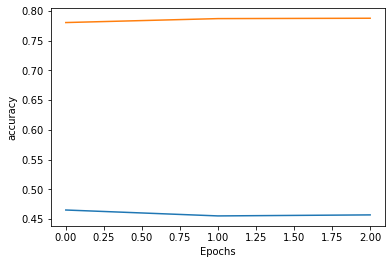

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')

In [80]:
model.evaluate(x_test,y_test)

5483/5483 [==============================] - 7s 1ms/step - loss: 0.4538 - accuracy: 0.7795


[0.45377299189567566, 0.7795319557189941]

In [81]:
y_pred=model.predict(x_test)

In [82]:
y_pred_hard=np.round(y_pred).astype(int)

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [84]:
print('Accuracy',accuracy_score(y_test,y_pred_hard))
print('confusion matrix',confusion_matrix(y_test,y_pred_hard))
print('F1 Score',f1_score(y_test,y_pred_hard))

Accuracy 0.7795319570941671
confusion matrix [[73935 13331]
 [25351 62837]]
F1 Score 0.7646450388181751


In [85]:
print(val_values(y_test,y_pred_hard))
print(val_class(y_test,y_pred_hard))

confusion_matrix=
 [[73935 13331]
 [25351 62837]]
Accuracy 0.7795319570941671
recall 0.7125345852043362
precision 0.824978993803172
loss 7.614757189584031
None
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     87266
           1       0.82      0.71      0.76     88188

    accuracy                           0.78    175454
   macro avg       0.78      0.78      0.78    175454
weighted avg       0.79      0.78      0.78    175454

None


# use of Ensemble with undersampling

In [74]:
df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [75]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=2,shuffle=y)

In [77]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(255836, 22)
(255836,)
(63959, 22)
(63959,)


In [78]:
y_train.value_counts()

0    233892
1     21944
Name: HeartDisease, dtype: int64

In [79]:
233892/21944

10.658585490339044

In [80]:
233892/10

23389.2

In [81]:
df2=x_train.copy()
df['HeartDisease']=y_train

In [82]:
df2_class0=df[df['HeartDisease']==0]
df2_class1=df[df['HeartDisease']==1]

In [83]:
df2_class0.shape,df2_class1.shape

((233892, 23), (21944, 23))

In [84]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df2_class0[:21944],df2_class1],axis=0)
    df_train.shape
    
    x_train=df_train.drop(columns=['HeartDisease'])
    y_train=df_train['HeartDisease']
    
    return x_train,y_train

In [85]:
x_train,y_train=get_train_batch(df2_class0,df2_class1,0,21944)

In [86]:
x_train.shape

(43888, 22)

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(43888, 22)
(43888,)
(63959, 22)
(63959,)


In [88]:
y_pred1=random(x_train,y_train,x_test,y_test)

confusion_matrix=
 [[41323 17207]
 [ 1280  4149]]
Accuracy 0.7109554558388967
recall 0.7642291398047523
precision 0.19427795467315978
loss 9.983459996023942
None
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     58530
           1       0.19      0.76      0.31      5429

    accuracy                           0.71     63959
   macro avg       0.58      0.74      0.56     63959
weighted avg       0.90      0.71      0.77     63959

None
